<a href="https://colab.research.google.com/github/AliVaghjipur/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow .keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras import utils
#from keras.utils.np_utils import to_categorical
import random

In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)    #(60000, 28, 28) => 28*28 pixels
print(X_test.shape)     #(10000, 28, 28)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels in training"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels in testing"
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28*28 in training"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28*28 in testing"


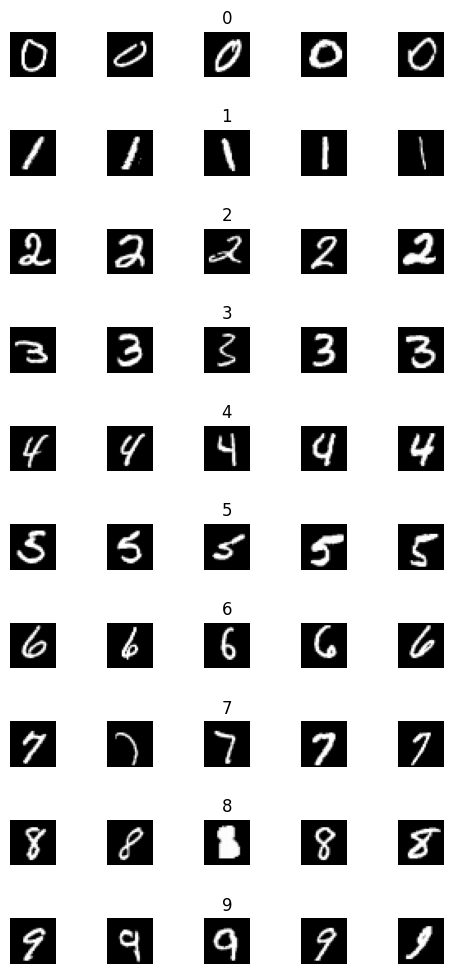

In [ ]:
num_of_samples = []

cols = 5 #random set of 5 images in each categories 0-9
num_classes = 10  #0-9 classes

#Creation of grid:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))    #5*10 inches fig size
fig.tight_layout()

#Filling up grid with images:
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

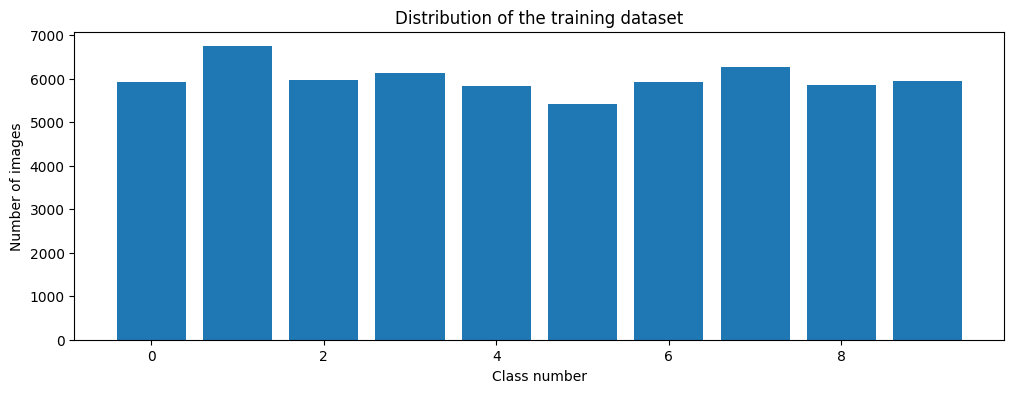

In [ ]:
#looking at number of data images for each class 0-9
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
#Normalising dataset so that the pixel values come down between 0-1 instead of 0-255
X_train = X_train/255
X_test = X_test/255

In [ ]:
#Flattening the image from 28*28 to 1*784 pixels
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

print(X_test.shape)

(10000, 784)


In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim=num_pixels, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='relu'))

  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                7850      
                                                                 
 dense_26 (Dense)            (None, 30)                330       
                                                                 
 dense_27 (Dense)            (None, 10)                310       
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
h = model.fit(X_train, y_train, validation_split=0.1, epochs=15, batch_size=200, verbose = 1, shuffle = 1)

Epoch 1/15
270/270 [==============================] - 2s 4ms/step - loss: 0.5706 - accuracy: 0.8199 - val_loss: 0.2852 - val_accuracy: 0.9140
Epoch 2/15
270/270 [==============================] - 1s 4ms/step - loss: 0.2984 - accuracy: 0.9119 - val_loss: 0.2231 - val_accuracy: 0.9347
Epoch 3/15
270/270 [==============================] - 1s 3ms/step - loss: 0.2741 - accuracy: 0.9187 - val_loss: 0.2328 - val_accuracy: 0.9315
Epoch 4/15
270/270 [==============================] - 1s 4ms/step - loss: 0.2594 - accuracy: 0.9234 - val_loss: 0.2145 - val_accuracy: 0.9363
Epoch 5/15
270/270 [==============================] - 1s 4ms/step - loss: 0.2478 - accuracy: 0.9271 - val_loss: 0.2140 - val_accuracy: 0.9398
Epoch 6/15
270/270 [==============================] - 1s 5ms/step - loss: 0.2381 - accuracy: 0.9303 - val_loss: 0.2095 - val_accuracy: 0.9370
Epoch 7/15
270/270 [==============================] - 2s 6ms/step - loss: 0.2310 - accuracy: 0.9322 - val_loss: 0.2109 - val_accuracy: 0.9382
Epoch 

Text(0.5, 0, 'epoch')

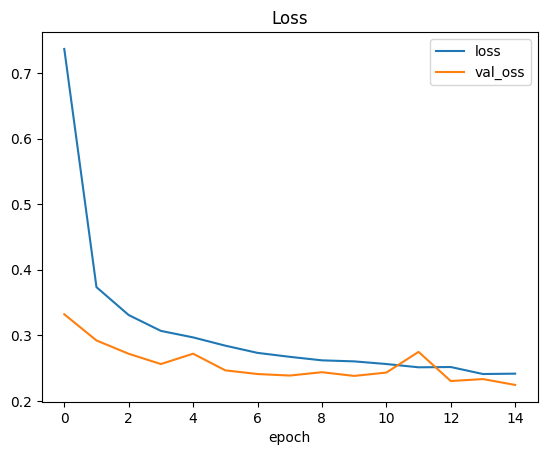

In [ ]:
plt.plot(h.history['loss'])   #loss in the training set
plt.plot(h.history['val_loss']) #loss in the validation set
plt.legend(['loss', 'val_oss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

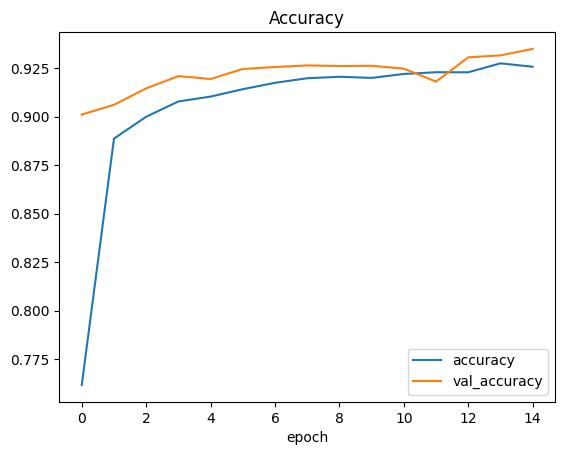

In [ ]:
plt.plot(h.history['accuracy'])   #loss in the training set
plt.plot(h.history['val_accuracy']) #loss in the validation set
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score = ', score[0])
print('Test accuracy = ', score[1])                    #92% accuracy obtained

<class 'list'>
Test score =  0.2754286229610443
Test accuracy =  0.920199990272522


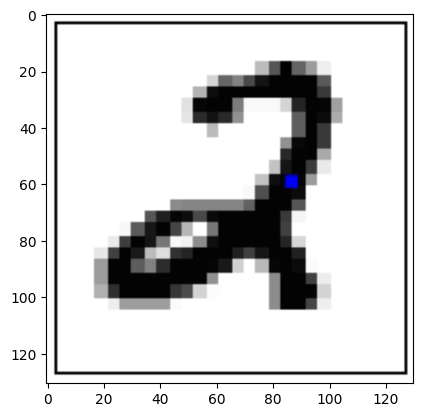

In [ ]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

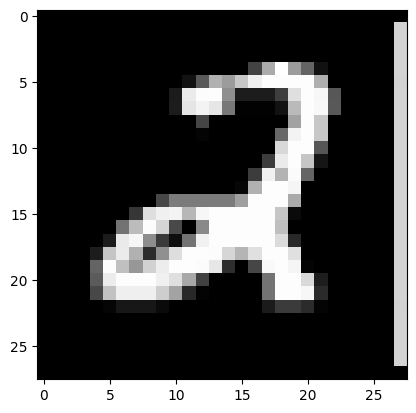

In [ ]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [ ]:
image = image/255
image = image.reshape(1, 784)


In [ ]:
prediction = np.argmax(model.predict(image), axis=-1)
print("Predicted digit = ", str(prediction))

1/1 [==============================] - 0s 22ms/step
Predicted digit =  [2]
